# **Time Series Forecasting**

 Change the path for input and output files and Run the cells one by one.

 You can directly skip to CNN part

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Arima seasonal model

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime
# load all data


from datetime import datetime
#We can use the read_csv() function to load the data and combine the first two columns into a single datetime column to use it as an index.
#dataset = pd.read_csv(r'/content/KMJ4Daily2018-2020.csv',index_col='Date',infer_datetime_format=True)
dataset = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Data/KMJ4Daily2018-2020.csv',index_col='Date',infer_datetime_format=True)

dataset = dataset.dropna()
#print(dataset.shape)

dataset.index = pd.to_datetime(dataset.index)

lastDate = dataset.last_valid_index()

print(lastDate)
next = lastDate + pd.DateOffset(days=1)
print(next)
rng = pd.date_range(next, periods=31, freq='D')
means = dataset.mean()
idx = pd.Index(rng)
NewData = dataset.append(pd.DataFrame(index=idx))
NewData = NewData.fillna(means)
#NewData.tail(40)

#print(NewData.tail(35))

2020-02-29 00:00:00
2020-03-01 00:00:00


In [ ]:

endDate = NewData.last_valid_index()
print("Predictions from :")
print(next ,  endDate)

Predictions from :
2020-03-01 00:00:00 2020-03-31 00:00:00


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib inline

from scipy import stats


import statsmodels.api as sm


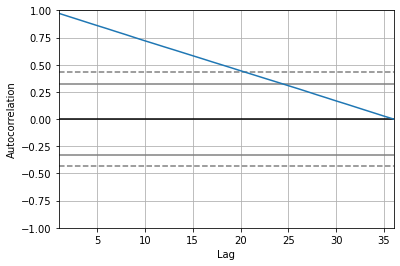

In [ ]:
import pandas
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
#from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot
q = NewData.resample('M').mean()
autocorrelation_plot(q)
pyplot.show() #p=20

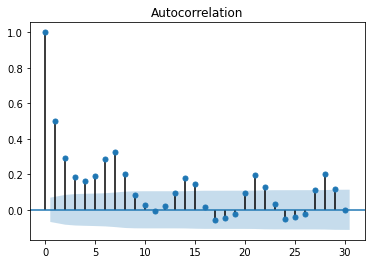

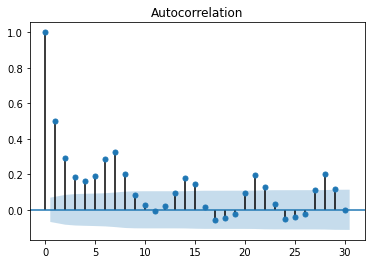

In [ ]:
plot_acf(NewData['Power Generation'])


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


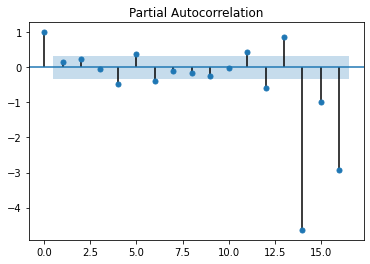

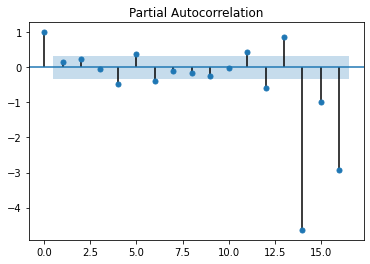

In [ ]:
plot_pacf(q['Power Generation']) #q val

In [ ]:
#d = 1

In [ ]:
sarimax_model = SARIMAX(NewData['Power Generation'],order=(20,1,4),seasonal_order=(1,1,1,30),exog=NewData['Temperature'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
res = sarimax_model.fit(maxiter=200,disp=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8030.272601000281


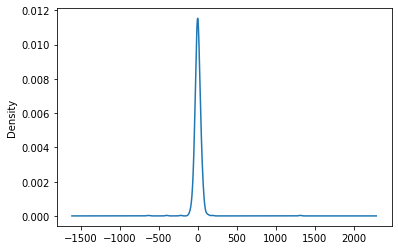

In [ ]:
print(res.aic)

res.resid.plot(kind='kde')

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Statespace Model Results                                 
===========================================================================================
Dep. Variable:                    Power Generation   No. Observations:                  821
Model:             SARIMAX(20, 1, 4)x(1, 1, 1, 30)   Log Likelihood               -3987.136
Date:                             Sat, 25 Jul 2020   AIC                           8030.273
Time:                                     01:55:48   BIC                           8161.090
Sample:                                          0   HQIC                          8080.556
                                             - 821                                         
Covariance Type:                               opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature     1.3363      2.138      0.625      0.532      -2.853       5.526
ar.L1          -0.9766      0.546     -1.788      0.074      -2.047       0.094
ar.L2          -0.7418      0.045    -16.619      0.000      -0.829      -0.654
ar.L3          -0.2324      0.382     -0.609      0.543      -0.980       0.516
ar.L4           0.5098      0.240      2.126      0.034       0.040       0.980
ar.L5           0.1659      0.094      1.761      0.078      -0.019       0.351
ar.L6           0.2365      0.071      3.319      0.001       0.097       0.376
ar.L7           0.3850      0.115      3.336      0.001       0.159       0.611
ar.L8           0.3311      0.132      2.508      0.012       0.072       0.590
ar.L9           0.1715      0.097      1.772      0.076      -0.018       0.361
ar.L10         -0.0136      0.069     -0.196      0.844      -0.149       0.122
ar.L11         -0.1711      0.076     -2.265      0.023      -0.319      -0.023
ar.L12         -0.1539      0.098     -1.572      0.116      -0.346       0.038
ar.L13         -0.1100      0.071     -1.554      0.120      -0.249       0.029
ar.L14          0.0267      0.071      0.377      0.706      -0.112       0.166
ar.L15          0.1908      0.082      2.333      0.020       0.030       0.351
ar.L16          0.1816      0.087      2.084      0.037       0.011       0.352
ar.L17          0.0517      0.071      0.731      0.464      -0.087       0.190
ar.L18         -0.0726      0.063     -1.155      0.248      -0.196       0.051
ar.L19         -0.1281      0.061     -2.109      0.035      -0.247      -0.009
ar.L20         -0.0829      0.054     -1.540      0.123      -0.188       0.023
ma.L1           0.3895      0.684      0.570      0.569      -0.950       1.730
ma.L2           0.0310      0.681      0.045      0.964      -1.304       1.366
ma.L3          -0.4939      0.669     -0.738      0.461      -1.805       0.818
ma.L4          -0.9262      0.689     -1.344      0.179      -2.277       0.425
ar.S.L30       -0.0497      0.035     -1.422      0.155      -0.118       0.019
ma.S.L30       -0.9051      0.035    -25.775      0.000      -0.974      -0.836
sigma2       1289.8630    553.099      2.332      0.020     205.810    2373.916
===================================================================================
Ljung-Box (Q):                       36.36   Jarque-Bera (JB):             10955.28
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -1.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
res.resid.describe()

count     821.000000
mean        0.294412
std        63.353831
min      -640.334711
25%       -20.406937
50%        -1.071082
75%        19.572524
max      1314.736978
dtype: float64

In [ ]:

predictions = res.predict(start = next, end = endDate,exog = NewData['Temperature'], dynamic= True)

In [ ]:
#print(pd1.tail(40))
pd1 = predictions.to_frame()
#print(pd1.tail(32))
#print(len(pd1),type(pd1))


In [ ]:
pd1.columns = ['Pow_Prediction']
pd1.index = pd1.index.rename('Date')
#print(pd1.tail(31))
#pd1.tail(31).plot()
final1 = pd1.iloc[-31:,:]
#Output file
final1.to_excel(r"/content/drive/My Drive/Colab Notebooks/Output/CNN/TimeSeriesPred1.xlsx")

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import datetime
# load all data
from keras.callbacks import ModelCheckpoint
# univariate multi-step vector-output 1d cnn model
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.models import load_model
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

from keras import backend
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# define input sequence
#change file path
df = pd.read_csv(r'/content/KMJ4Daily2018-2020working.csv')

df = df.dropna()
raw_seq = df['Power Generation'].tolist()
# choose a number of time steps 365 is for input steps and 31 is number of days ahead
#n_steps_in, n_steps_out =365,31
n_steps_in, n_steps_out =365,31
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features)) #shape[0] = total data, shape [1] = 365

# define model



#CNN Model run from here

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import datetime
# load all data
from keras.callbacks import ModelCheckpoint
# univariate multi-step vector-output 1d cnn model
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.models import load_model
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

from keras import backend
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# define input sequence
#change file path
df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Data/KMJ4Daily2018-2020.csv')

df = df.dropna()

raw_seq = df['Power Generation'].tolist()


#print(raw_seq)

#raw_seq = df["Power Generation"].tolist()

#raw_seq = scaled_df1[0].tolist()

# choose a number of time steps 365 is for input steps and 31 is number of days ahead
#n_steps_in, n_steps_out =365,31
n_steps_in, n_steps_out =365,31
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features)) #shape[0] = total data, shape [1] = 365

# define model

model = Sequential()


#the performance of the model can be optized by increasing the hidden layers  and epochs
#model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features))) #change the number of filters to tune. TUNING<<<<<<<<<<
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features))) #change the number of filters to tune. TUNING<<<<<<<<<< INPUT LAYER
model.add(MaxPooling1D(pool_size=2)) #add the max-pooling layer with MaxPooling1D() SECOND LAYER - POOLING layer
model.add(Flatten()) #normalize the shape of pooling layer
model.add(Dense(1000, activation='relu'))#relu activation function , change the dense to tune the model - add dense layer 4th layer

model.add(Dense(n_steps_out)) #output layer

# Stop the training once the monitor value are achieve and patiently train the model until number of epoch when there is still no improvement
#es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=80) #change the monitor parameter and patience to tune. TUNING<<<<<<<<<<<
es = EarlyStopping(monitor='val_loss', verbose=1, patience=100, mode='auto') #change the monitor parameter and patience to tune. TUNING<<<<<<<<<<<
#mc = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/Output/CNN/best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True) # change the monitor parameter to tune
mc = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/Output/CNN/best_modelTunORI.h5', monitor='val_loss', mode='auto', verbose=1, save_best_only=True) # change the monitor parameter to tune
# fit model

from tensorflow.python.saved_model import loader_impl
from tensorflow.python.keras.saving.saved_model import load as saved_model_load

#change loss parameter to tune
#model.compile(optimizer='adam', loss='mse',metrics=['rmse','mape','mse','mae','accuracy']) #for rmse score
#model.compile(optimizer='adam', loss='mse',metrics=['mse','accuracy','mae'])
model.compile(optimizer='adam', loss='mse',metrics=['mse','mape','mae'])
# Compile model

# fit model
history = model.fit(X, y, validation_split=0.33, epochs=2000, verbose=1, callbacks=[es, mc]) #change the  validation_split from 0.50 to 0.10 tune
# load the saved model
#saved_model = load_model('best_model.h5', custom_objects={"rmse": rmse}) #for rmse score

saved_model = load_model('/content/drive/My Drive/Colab Notebooks/Output/CNN/best_modelTunORI.h5')

Train on 264 samples, validate on 131 samples
Epoch 1/2000
264/264 [==============================] - 1s 4ms/step - loss: 813314.2538 - mse: 813314.2500 - mape: 55.2081 - mae: 742.8277 - val_loss: 186129.5582 - val_mse: 186129.5625 - val_mape: 25.3746 - val_mae: 344.8979

Epoch 00001: val_loss improved from inf to 186129.55821, saving model to /content/drive/My Drive/Colab Notebooks/Output/CNN/best_modelTunORI.h5
Epoch 2/2000
264/264 [==============================] - 1s 3ms/step - loss: 125307.5679 - mse: 125307.5703 - mape: 21.4587 - mae: 288.3102 - val_loss: 46946.2138 - val_mse: 46946.2188 - val_mape: 12.4473 - val_mae: 169.5600

Epoch 00002: val_loss improved from 186129.55821 to 46946.21383, saving model to /content/drive/My Drive/Colab Notebooks/Output/CNN/best_modelTunORI.h5
Epoch 3/2000
264/264 [==============================] - 1s 3ms/step - loss: 45136.1661 - mse: 45136.1719 - mape: 12.5306 - mae: 168.9973 - val_loss: 11100.8574 - val_mse: 11100.8574 - val_mape: 5.8321 - val

In [ ]:
scores = saved_model.evaluate(X,y,verbose=0)
print((model.metrics_names, scores))
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))

(['loss', 'mse', 'mape', 'mae'], [832.6557417857496, 832.65576171875, 1.7131614685058594, 23.187314987182617])


In [ ]:
# demonstrate prediction
# input data is 365 days data and predicting next month data which is already mentioned in the above code
x_input = array(raw_seq[-365:])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = saved_model.predict(x_input, verbose=0)

print(yhat)

[[1325.8025 1327.5068 1360.2291 1351.7134 1366.1255 1336.6168 1366.1265
  1338.3992 1353.2864 1365.0427 1341.3945 1352.9818 1340.1605 1326.5836
  1338.5049 1356.2307 1339.5215 1349.2551 1332.641  1330.7112 1330.2351
  1349.3733 1370.0616 1351.3438 1353.8008 1362.8398 1337.9276 1360.018
  1339.9556 1360.2616 1345.2521]]


In [ ]:
#Creating output file for the predictions:

df.index = df["Date"]

df.index = pd.to_datetime(df.index)

lastDate = df.last_valid_index()

print(lastDate)
next = lastDate + pd.DateOffset(days=1)
print(next)

rng = pd.date_range(next, periods=31, freq='D') #only change periods in order to change number of prediction days ahead
idx = pd.Index(rng)

new = pd.DataFrame(yhat.reshape(-1, len(yhat)), columns=['Pred'], index= idx)


2020-02-29 00:00:00
2020-03-01 00:00:00


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 364, 32)           96        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 182, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5824)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              5825000   
_________________________________________________________________
dense_4 (Dense)              (None, 31)                31031     
Total params: 5,856,127
Trainable params: 5,856,127
Non-trainable params: 0
_________________________________________________________________


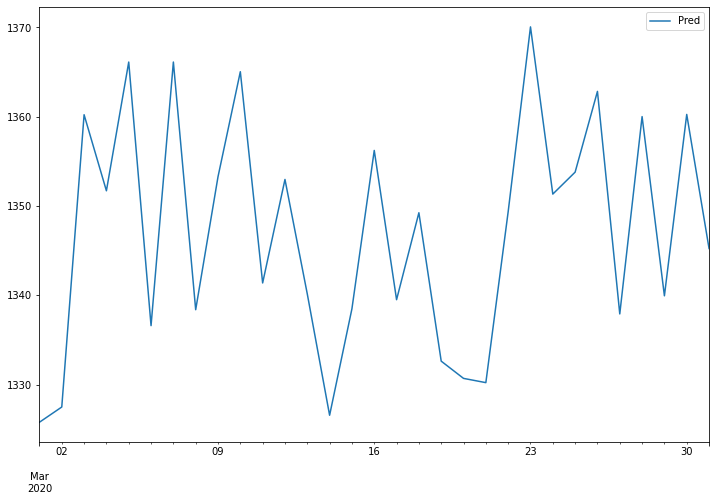

In [ ]:

new.plot(figsize=(12, 8))

In [ ]:

#output file
new.to_excel(r"/content/drive/My Drive/Colab Notebooks/Output/CNN/CNNnewORI.xlsx")

In [ ]:
#save the model
#import pickle
#filename = '/content/drive/My Drive/Colab Notebooks/Output/CNN/final_modelORI.sav'

saved_model = load_model('/content/drive/My Drive/Colab Notebooks/Output/CNN/best_modelORI.h5')
#pickle.dump(saved_model, open(filename, 'wb'))

OSError: ignored



---



# **RUN saved model**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import datetime
# load all data
from keras.callbacks import ModelCheckpoint
# univariate multi-step vector-output 1d cnn model
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.models import load_model
# save the model to disk (not compulsary)
# split into samples
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


#input file
df = pd.read_csv(r'/content/KMJ4Daily2018-2020working.csv') #change the path to your drive

df = df.dropna()
raw_seq = df['Power Generation'].tolist()
n_steps_in, n_steps_out =365,31
n_features=1
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model


#filename = '/content/drive/My Drive/Colab Notebooks/Output/CNN/final_modelORI.sav'


x_input = array(raw_seq[-365:])
x_input = x_input.reshape((1, n_steps_in, n_features))

# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
loaded_model=load_model("/content/best_modelTunORI2021.h5") #change the path to your drive
result = loaded_model.predict(x_input, verbose=0)
#Creating output file for the predictions:

df.index = df["Date"]

df.index = pd.to_datetime(df.index)

lastDate = df.last_valid_index()


next = lastDate + pd.DateOffset(days=1)


rng = pd.date_range(next, periods=31, freq='D') #only change periods in order to change number of prediction days ahead
idx = pd.Index(rng)

print(result)

[[1319.5477 1326.372  1358.545  1379.992  1361.9772 1341.6324 1332.5635
  1324.5172 1359.728  1342.9739 1334.2219 1378.7085 1332.9619 1329.2843
  1330.1661 1370.6166 1377.0189 1372.334  1347.995  1364.9419 1311.7999
  1340.3418 1382.6921 1354.2084 1323.6033 1329.4513 1344.5542 1340.7234
  1350.4855 1364.017  1341.736 ]]


In [ ]:
new1 = pd.DataFrame(result.reshape(-1, len(result)), columns=['Pred'], index= idx)

In [ ]:
#output file
new1.to_excel(r"/content/drive/My Drive/Colab Notebooks/Output/CNN/CNNSavedModelORI.xlsx")

In [ ]:
scores = saved_model.evaluate(X,y,verbose=0)
print((model.metrics_names, scores))
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))

In [ ]:
new1.plot(figsize=(12, 8))